In [2]:
#Common to all 3 subparts
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

#Loading the images from the folder "Images"
images = []
for design in os.listdir("Images"):
    img = cv2.imread(os.path.join("Images", design))
    if img is not None:
        images.append(img)

# Preprocessing images
preprocessed_images = []
for img in images:
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Thresholding to get the yellow shape
    _, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
    preprocessed_images.append(binary)

Explained Variance Ratio for each component:
[0.20715113 0.17974214 0.08868839 0.04849206 0.04670178 0.03966176
 0.02963981 0.02685124 0.0204337  0.01880771 0.0172292  0.01563651
 0.01494085 0.01398709 0.01195292 0.011216   0.00969981 0.00934985
 0.00850759 0.00739979 0.00708261 0.00691549 0.00616094 0.00610356
 0.00573692 0.00564175 0.00547575 0.00492187 0.0048068  0.00450255
 0.00437199 0.00410893 0.00397548 0.00382917 0.00364291 0.00344886
 0.00328059 0.00309062 0.00302025 0.00286024 0.00280288 0.00264834
 0.00262219 0.00252134 0.00247536 0.00239859 0.00229105 0.00220652
 0.00208697 0.00202617 0.00197599 0.00187917 0.0017793  0.00165723
 0.0016524  0.00161496 0.00153644 0.00147457 0.00145087 0.00140013
 0.00135259 0.00128764 0.00128167 0.00120685 0.00118586 0.00115655
 0.00109788 0.00104978 0.00101395 0.00100291 0.00094976 0.0009186
 0.00089971 0.00087108 0.00084023 0.00082025 0.0007854  0.00078059
 0.00073591 0.00072643 0.00070172 0.00065377 0.000618   0.00060967
 0.00059586 0.0005

c:\Users\Anubha Vyasamudri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Anubha Vyasamudri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Anubha Vyasamudri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Anubha Vyasamudri\AppData\Local\Programs

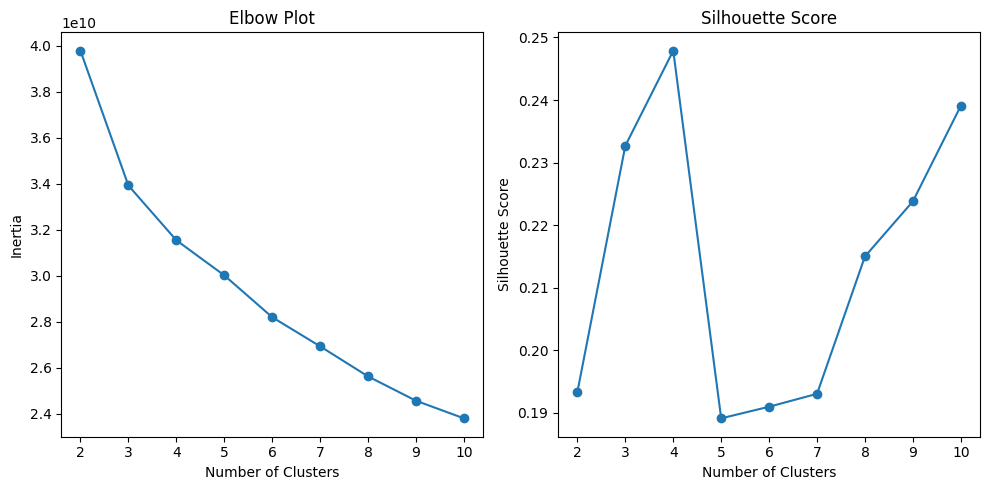

c:\Users\Anubha Vyasamudri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


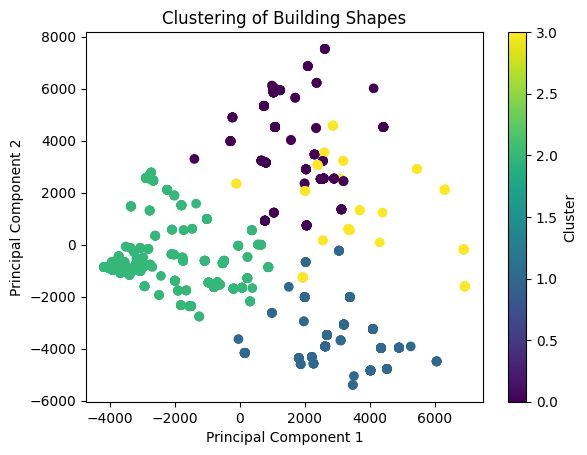

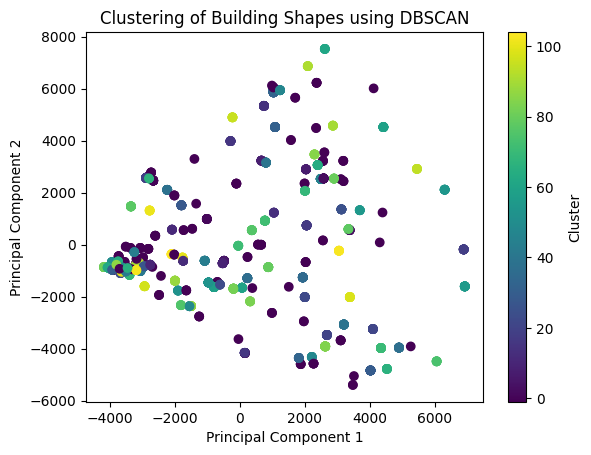

{2: [0, 1, 4, 5, 6, 9, 10, 11, 12, 13, 17, 22, 27, 28, 29, 31, 32, 33, 34, 36, 38, 46, 48, 49, 50, 53, 54, 56, 57, 58, 59, 61, 65, 66, 70, 71, 73, 74, 75, 76, 79, 80, 82, 84, 85, 89, 92, 94, 95, 96, 99, 100, 101, 102, 104, 105, 107, 108, 110, 112, 113, 114, 117, 118, 122, 123, 125, 126, 128, 129, 131, 134, 139, 140, 142, 144, 145, 147, 148, 150, 151, 153, 154, 155, 157, 158, 161, 163, 165, 167, 169, 173, 174, 176, 180, 190, 191, 192, 195, 197, 199, 200, 202, 203, 207, 208, 209, 210, 212, 215, 219, 220, 222, 224, 225, 226, 227, 228, 230, 231, 232, 234, 235, 236, 240, 241, 243, 246, 248, 251, 255, 258, 259, 264, 265, 270, 273, 274, 276, 277, 278, 279, 282, 285, 286, 288, 292, 294, 297, 301, 303, 306, 308, 309, 314, 315, 319, 320, 321, 324, 325, 327, 328, 329, 331, 332, 333, 334, 339, 341, 344, 346, 349, 350, 351, 353, 354, 355, 356, 357, 360, 361, 362, 364, 366, 370, 375, 378, 380, 381, 385, 391, 395, 400, 401, 402, 404, 412, 413, 414, 419, 421, 422, 423, 425, 428, 430, 433, 434, 435, 43

In [3]:
# Subpart 1: Categorization based on shape
# Feature extraction
features = []
for img in preprocessed_images:
    # Resize image to a fixed size
    img = cv2.resize(img, (100, 100))
    # Flatten the image into a 1D array
    features.append(img.flatten())
X=np.array(features)

# Reduce dimensionality using PCA
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)

#Checking number of components
# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

print("Explained Variance Ratio for each component:")
print(explained_variance_ratio)

# Cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

print("\nCumulative Explained Variance Ratio:")
print(cumulative_explained_variance_ratio)

#Finding optimal number of clusters for kmeans
# Define a range of cluster numbers to try
range_n_clusters = range(2, 11)  # Try clusters from 2 to 10

# Initialize lists to store inertia and silhouette scores
inertia_values = []
silhouette_scores = []

# Loop through different numbers of clusters
for n_clusters in range_n_clusters:
    # Fit KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    
    # Calculate inertia 
    inertia = kmeans.inertia_
    inertia_values.append(inertia)
    
    # Calculate silhouette score
    silhouette = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette)

# Plot the elbow plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')

# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

# Function to store images in clusters
def store_images_in_clusters(labels):
    clusters = {}
    for idx, label in enumerate(labels):
        if label not in clusters:
            clusters[label] = [idx]
        else:
            clusters[label].append(idx)
    return clusters

# Cluster images using KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_pca)
labels=kmeans.labels
print(labels)

# Visualize clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clustering of Building Shapes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Cluster images using DBSCAN
dbscan = DBSCAN(eps=100, min_samples=5)
db_clusters = dbscan.fit_predict(X_pca)

# Visualize clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=db_clusters, cmap='viridis')
plt.title('Clustering of Building Shapes using DBSCAN')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Store images in clusters
k_clusters_dict = store_images_in_clusters(kmeans.labels_)
db_clusters_dict = store_images_in_clusters(db_clusters)
print(k_clusters_dict)

In [4]:
#Subpart 2: Categorizing designs based on complexity
# Extracting features from processed images, based on 4 criteria
from matplotlib.patches import Rectangle
features = []
#Forsubpart 3, we make a list of areas, lengths and widths of bounding box of each image

layout_widths=[]
layout_heights=[]
layout_areas=[]
for img in preprocessed_images:
    
    # Calculating symmetry
    mirror_img = cv2.flip(img, 1)
    diff = cv2.absdiff(img, mirror_img)
    symmetry = np.mean(diff)
        
    # Calculating contour
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = contours[0]
            
    # Calculating perimeter
    perimeter = cv2.arcLength(contour, True)
            
    # Calculating contour area
    contour_area = cv2.contourArea(contour)
    layout_areas.append(contour_area)
            
    # Calculating perimeter-to-area ratio
    ratio = perimeter / contour_area
        
    # Calculating convexity defects
    hull = cv2.convexHull(contour, returnPoints=False)
    defects = cv2.convexityDefects(contour, hull)
    num_defects = defects.shape[0] if defects is not None else 0
        
    # Calculating shape complexity (counting the number of contour points)
    shape_complexity = len(contour)
    features.append([ratio, num_defects, symmetry, shape_complexity])

    x, y, w, h = cv2.boundingRect(contour)
    layout_widths.append(w)
    layout_heights.append(h)
       
X=np.array(features)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Cluster images using KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

# Count and print the number of images in each cluster
cluster_counts = {i: np.sum(kmeans.labels_ == i) for i in range(3)}
print("Number of images in each cluster:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} images")

# Convert cluster labels to complexity labels
complexity_labels = {0: "Low", 1: "Medium", 2: "High"}
complexity_classes = [complexity_labels[label] for label in kmeans.labels_]
    
# Store images in classes based on complexity
classes = {}
for i, label in enumerate(complexity_classes):
    if label not in classes:
        classes[label] = [i]
    else:
        classes[label].append(i)

print("Dictionary containing classes based on complexity:")
print(classes)


Number of images in each cluster:
Cluster 0: 628 images
Cluster 1: 381 images
Cluster 2: 174 images
Dictionary containing classes based on complexity:
{'Medium': [0, 2, 6, 7, 10, 11, 15, 16, 18, 20, 22, 24, 25, 30, 43, 45, 50, 54, 55, 59, 62, 63, 64, 65, 72, 75, 77, 79, 85, 86, 98, 107, 110, 111, 116, 117, 123, 126, 127, 128, 129, 132, 136, 137, 143, 146, 148, 158, 163, 165, 169, 170, 175, 176, 177, 179, 181, 182, 184, 186, 187, 189, 191, 192, 193, 195, 200, 208, 213, 218, 220, 221, 222, 227, 228, 229, 231, 233, 238, 239, 240, 241, 242, 244, 245, 246, 249, 250, 255, 261, 262, 266, 269, 270, 271, 277, 278, 281, 282, 283, 288, 290, 294, 295, 297, 300, 304, 307, 308, 311, 317, 318, 320, 325, 327, 337, 340, 343, 347, 348, 352, 353, 359, 361, 363, 364, 365, 366, 372, 374, 376, 378, 383, 384, 386, 387, 389, 390, 394, 396, 401, 403, 412, 417, 418, 419, 423, 424, 437, 441, 443, 444, 445, 448, 449, 458, 461, 463, 464, 467, 468, 472, 477, 478, 479, 480, 486, 487, 489, 492, 494, 495, 496, 500, 50

c:\Users\Anubha Vyasamudri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
#Subpart 3: Retrieval of prior layouts based on gross parameters

# User-specified parameters
complexity = "Low"  # Low, Medium, or High
length = 65  # Dimensions of bounding box
width = 15   # Dimensions of bounding box
area = 1500  # Area of the image

# Preprocess input parameters
input_params = np.array([area, length, width])

# Calculate mean of input parameters for each cluster
distances={}
for cluster, indices in k_clusters_dict.items():
    # Get the image indexes belonging to the cluster
    cluster_indices = indices
    
    # Filter image indices belonging to the specified complexity class
    complexity_indices = [idx for idx in cluster_indices if idx in classes[complexity]]
    
    # Calculate mean of input parameters for images belonging to the cluster and specified complexity class
    if len(complexity_indices) > 0:
        cluster_area = np.mean([layout_areas[idx] for idx in complexity_indices])
        cluster_length = np.mean([layout_widths[idx] for idx in complexity_indices])
        cluster_width = np.mean([layout_heights[idx] for idx in complexity_indices])
        
         # Calculate Euclidean distance between input parameters and cluster centroid
        cluster_params = np.array([cluster_area, cluster_length, cluster_width])
        distance = np.linalg.norm(input_params - cluster_params)
        
        # Store distance for the cluster
        distances[cluster] = distance

# Find closest cluster
closest_cluster = min(distances, key=distances.get)

# Output the result
print(f"The closest shape-based cluster for complexity '{complexity}' and dimensions (length={length}, width={width}) with area={area} is '{closest_cluster}'")

The closest shape-based cluster for complexity 'Low' and dimensions (length=65, width=15) with area=1500 is '2'
